In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import scipy
from wordcloud import WordCloud
from matplotlib.pyplot import imread
%matplotlib inline

In [6]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Elon Musk

In [7]:
# load the dataset
mail=pd.read_csv(r'C:\Users\PC\Downloads\Data Science\Data Science Assignments\11. Text Mining\Elon_musk.csv', encoding='latin-1')
mail

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
mail.drop(['Unnamed: 0'],inplace=True,axis=1)
mail

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
mail=[Text.strip() for Text in mail.Text]
mail=[Text for Text in mail if Text]

In [10]:
# joining the list into one string or text

text=' '.join(mail)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [11]:
# To remove Twitter Username and tokenise it.
from nltk.tokenize import TweetTokenizer
tknr=TweetTokenizer(strip_handles=True)
tokens=tknr.tokenize(text)
print(tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [12]:
#Again joining the list into one string /text

text1=' '.join(tokens)
text1

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [13]:
# Remove punctuation mark
punc=text1.translate(str.maketrans('', '', string.punctuation))
punc

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [14]:
# word Tokenization
from nltk.tokenize import word_tokenize

In [15]:
word_tk=word_tokenize(punc)
print(word_tk)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'httpstco3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'se

In [16]:
len(word_tk)

18502

In [17]:
token_text=' '.join(word_tk)
token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge All thought he would fail Himself most of all httpstcozGxJFDzzrM Haha thanks Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together o

In [18]:
# remove url to http

import re
url=re.sub(r'http\s+','',punc)
url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [19]:
url_token=word_tokenize(url)
print(url_token)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'httpstco3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'se

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# remove stopwords
stop_word=stopwords.words('english')
stop_word2= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
stop_word.extend(stop_word2)
no_stop_word=[word for word in url_token if not word in stop_word]
print(no_stop_word)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'httpstco3rWE9uHSTS', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'httpstcoFc9uhQSd7O', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elem

In [22]:
# Normalize the data
norm=[Text.lower() for Text in no_stop_word]
print(norm)

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'httpstco3rwe9uhsts', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'httpstcofc9uhqsd7o', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elem

In [23]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
df=nlp(' '.join(norm))
print(df)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse httpstco3rwe9uhsts it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power httpstcofc9uhqsd7o any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission httpstco3pwt once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however httpstco9z8ac6skqx spacex needs pass deep chasm negative cash flow next year httpstco7j1c92hdjl lowest cost per ton carbon 

In [24]:
lemma=[token.lemma_ for token in df]
print(lemma)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'httpstco3rwe9uhst', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'httpstcofc9uhqsd7o', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'toge

In [25]:
clean=' '.join(lemma)
clean

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all think would fail himself httpstcozgxjfdzzrm haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse httpstco3rwe9uhst it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power httpstcofc9uhqsd7o any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission httpstco3pwt once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however httpstco9z8ac6skqx spacex need pass deep chasm negative cash flow next year httpstco7j1c92hdjl low cost per ton carbon sequester net value product make mu

In [26]:
# feature Extraction
from tkinter.constants import X
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
X=vect.fit_transform(lemma)

In [27]:
print(vect.vocabulary_)

{'alien': 195, 'ray': 3008, 'trace': 3671, 'cyberpunk': 768, 'hdr': 1363, 'nextlevel': 2618, 'have': 1358, 'try': 3703, 'great': 1311, 'interview': 2211, 'doge': 893, 'underestimate': 3836, 'congratulation': 676, 'tesla': 3579, 'china': 586, 'amazing': 219, 'execution': 1062, 'last': 2295, 'year': 4053, 'now': 2646, 'next': 2617, 'even': 1036, 'happy': 1345, 'new': 2615, 'ox': 2747, 'httpstco9wfkmyu2oj': 1543, 'frodo': 1212, 'underdoge': 3835, 'all': 198, 'think': 3607, 'would': 4039, 'fail': 1096, 'himself': 1404, 'httpstcozgxjfdzzrm': 2076, 'haha': 1334, 'thank': 3589, 'indeed': 2151, 'tweet': 3718, 'definitely': 806, 'represent': 3074, 'realworld': 3023, 'time': 3630, 'allocation': 200, 'the': 3593, 'entertaining': 1006, 'outcome': 2725, 'likely': 2349, 'just': 2253, 'send': 3218, 'agree': 179, 'clubhouse': 615, 'httpstco3rwe9uhst': 1481, 'it': 2230, 'get': 1271, 'real': 3018, 'buy': 504, 'dogecoin': 895, 'lil': 2350, 'toddler': 3641, 'hodler': 1410, 'he': 1364, 'issue': 2229, 'sent

In [28]:
print(vect.get_feature_names())

['000', '005', '10', '100', '1000', '10000', '107', '10x', '11', '12', '122', '13', '130', '14', '140', '149', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1st', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240', '25', '250', '250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(X.toarray().shape)

(12155, 4074)


In [31]:
# Count Vectorizer
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemma)

In [32]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
#TFIDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemma)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock', 'doge', 'dojo', 'dragon', 'drive', 'dron

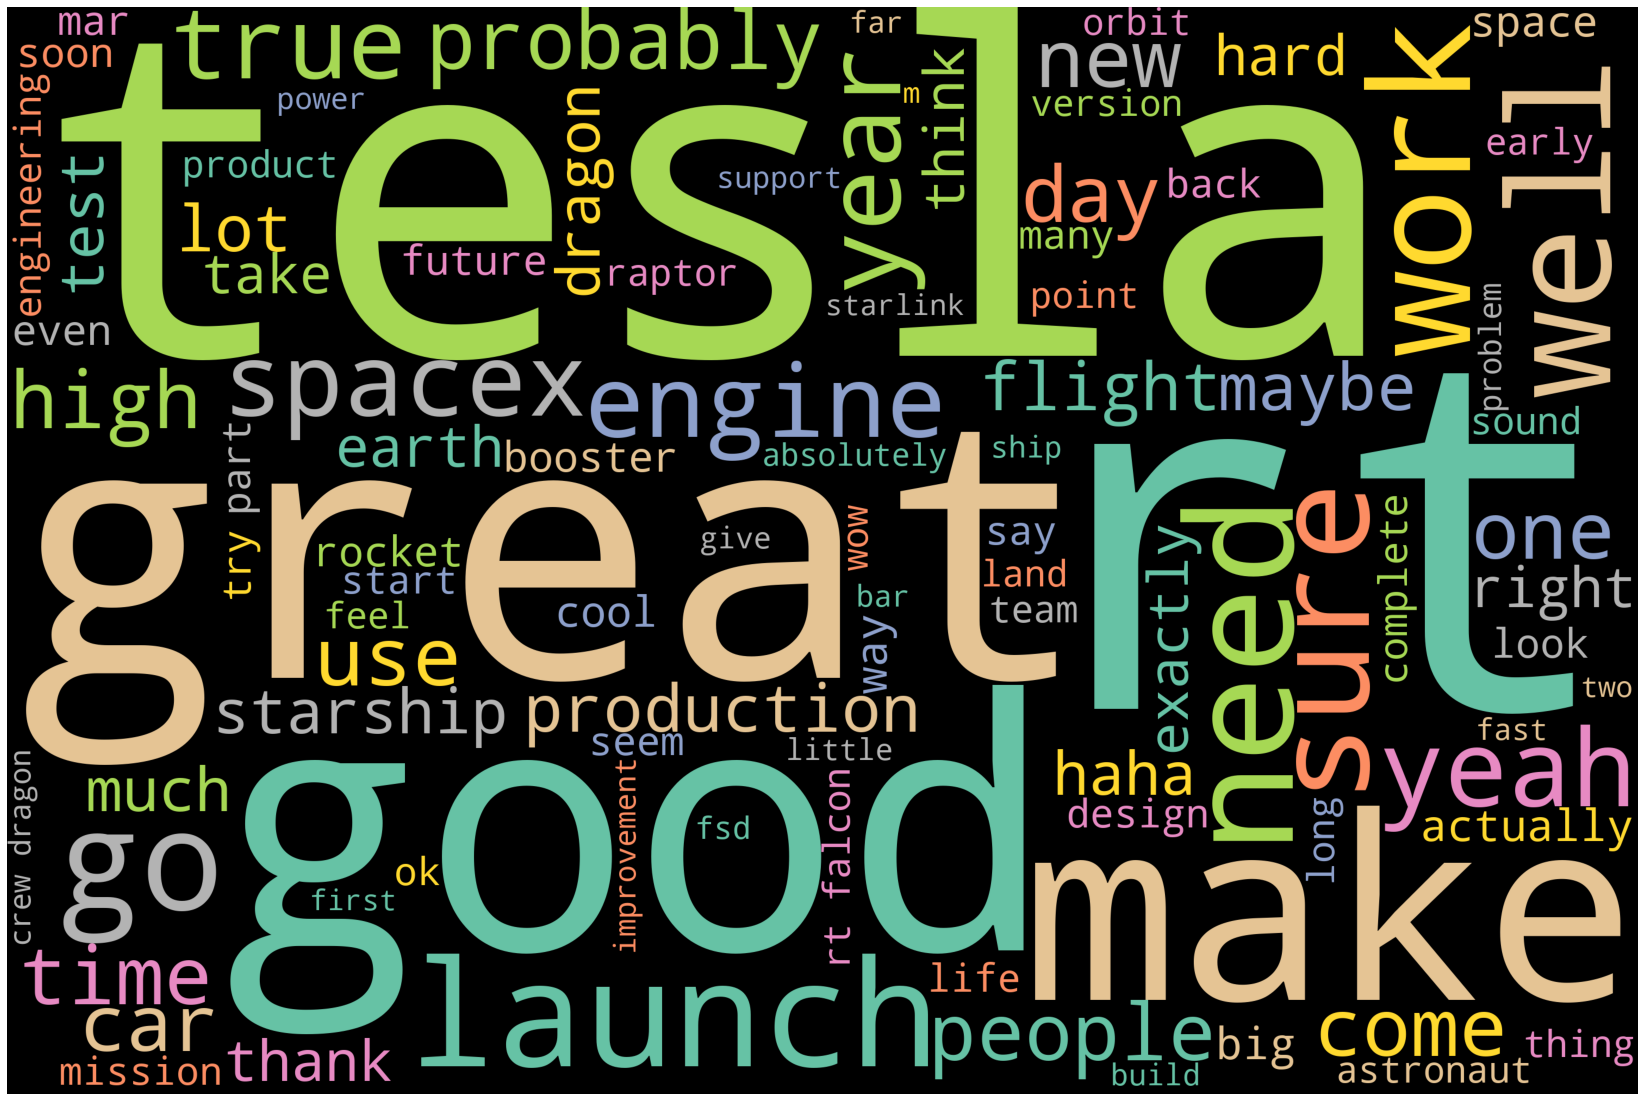

In [36]:
# Generate WordCloud
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off")
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean)
plot_cloud(wordcloud)

In [37]:
nlp=spacy.load("en_core_web_sm")
one_block = clean
docs = nlp(one_block)
spacy.displacy.render(docs, style='ent',)

In [38]:
for token in docs:
    print(token, token.pos_)

alien PROPN
ray NOUN
trace NOUN
cyberpunk PROPN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge X
underestimate PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox PROPN
httpstco9wfkmyu2oj PROPN
frodo PROPN
underdoge INTJ
all PRON
think VERB
would AUX
fail VERB
himself PRON
httpstcozgxjfdzzrm ADV
haha PRON
thank AUX
indeed ADV
tweet NOUN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse NOUN
httpstco3rwe9uhst NOUN
it PRON
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil PROPN
x PROPN
toddler NOUN
hodler NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem VERB
bit ADV
high ADJ
thank NOUN
fix NOUN
please INTJ
unlock VERB
account NOUN
this DET
true ADJ
power NOUN
httpstcofc9uhqsd7o VERB
any DET
crypto NOUN
wallet NOUN
give VERB
private ADJ
ke

top ADJ
speed NOUN
right ADJ
tire NOUN
first ADJ
production NOUN
car NOUN
ever ADV
achieve VERB
0 NUM
60 NUM
mph NOUN
less ADJ
2 NUM
second NOUN
it PRON
play VERB
cyberpunk ADJ
plaid NOUN
model NOUN
s PART
ship NOUN
next ADJ
month NOUN
httpstcohfuptnqipb PROPN
even ADV
discord PROPN
go VERB
corpo NOUN
yup INTJ
wild ADJ
time NOUN
discord PROPN
httpstcof23fxqkbce PROPN
wait VERB
faa PROPN
review PROPN
gamestonk PROPN
httpstcorztkdzaewj PROPN
pass VERB
initial ADJ
pressure NOUN
test NOUN
httpstcov7cffwac0a NOUN
buy VERB
hand PROPN
knit PROPN
wool PROPN
marvin PROPN
martian PROPN
helm PROPN
dog PROPN
httpstcogpcvjibtlm PROPN
kinda PROPN
love PROPN
etsy PROPN
it PRON
serve VERB
public ADJ
hamstring NOUN
starlink NOUN
today NOUN
amazon NOUN
satellite NOUN
system NOUN
httpstcosnigkxdxfp NOUN
we PRON
hope VERB
faa PROPN
approval PROPN
test NOUN
flight NOUN
tomorrow NOUN
afternoon NOUN
the DET
entire ADJ
 PRON
stack NOUN
 PROPN
data NOUN
collection NOUN
labeling NOUN
inference NOUN
surround V

landing NOUN
zone NOUN
1 NUM
httpstcomr18qv3goc NOUN
rt X
liftoff ADP
httpstcoag4rar6qnp PROPN
stand VERB
today NOUN
inspect VERB
rocket NOUN
hopefully ADV
launch VERB
tomorrow NOUN
pressure NOUN
slightly ADV
high ADJ
upper ADJ
stage NOUN
liquid NOUN
oxygen NOUN
tank NOUN
review NOUN
underway ADV
hope VERB
back ADV
next ADJ
month NOUN
very ADV
impressive ADJ
mission NOUN
china PROPN
last PROPN
launch NOUN
2020 NUM
come VERB
he PRON
indeed ADV
quite ADV
grumpy ADJ
actually ADV
know VERB
point NOUN
it PRON
get VERB
absurdly ADV
good ADJ
tesla NOUN
ai PROPN
autopilot PROPN
engineering PROPN
awesome ADJ
there ADV
great ADJ
ai VERB
ther PROPN
httpstcov8muheapoq PROPN
star PROPN
light PROPN
star PROPN
bright ADJ
httpstco6cetazsxco PROPN
this DET
incorrect ADJ
but CCONJ
visually ADV
stunning ADJ
playability NOUN
good ADJ
a DET
tshirt NOUN
well ADV
armor PROPN
kevlar PROPN
chest NOUN
plate NOUN
make VERB
sense NOUN
absence NOUN
magic NOUN
also ADV
w AUX
httpstcoiydkttvsqk VERB
oh INTJ
umm NOUN

do VERB
comment NOUN
turbopump NOUN
internal ADJ
detail NOUN
roughly ADV
ballpark NOUN
wow ADP
roc PROPN
httpstco0srlfg03fg PROPN
to PART
clear VERB
xpeng PROPN
problem NOUN
other ADJ
company NOUN
china PROPN
do AUX
andrej PROPN
awesome ADV
say VERB
talented ADJ
autopilot NOUN
httpstco64ocngk3ey NOUN
yeah INTJ
they PRON
steal VERB
apple NOUN
code NOUN
httpstcogy4dt7pq9n NOUN
they PRON
old ADJ
version NOUN
software NOUN
nn ADP
inference NOUN
computer NOUN
wild ADJ
time NOUN
congrat PROPN
yup PROPN
change NOUN
part NOUN
otherwise ADV
fine ADJ
caution NOUN
strongly ADV
advise VERB
spac NOUN
sure ADJ
haha PROPN
sexy VERB
cropping NOUN
champion NOUN
time NOUN
if SCONJ
next ADJ
week NOUN
release NOUN
look VERB
good ADJ
widen ADJ
beta NOUN
unfortunately ADV
many ADJ
rule NOUN
around ADP
liquor NOUN
distribution NOUN
even ADV
we PRON
httpstcokvhlbuee1u PROPN
next ADJ
week NOUN
release VERB
special ADJ
lot NOUN
fundamental ADJ
improvement NOUN
important ADJ
bug NOUN
fix NOUN
entire ADJ
n NOUN
h

cov X
2 NUM
pcr PROPN
detection PROPN
n1 PROPN
n3 PROPN
gene NOUN
30 NUM
cycle NOUN
reliable ADJ
40 NUM
cycle NOUN
note VERB
spike ADJ
protein NOUN
they PRON
consider VERB
reliable ADJ
just ADV
speak VERB
directly ADV
test VERB
lab VERB
their PRON
main ADJ
pcr NOUN
search NOUN
n1 ADJ
gene NOUN
unique ADJ
httpstcox57odvdauo NOUN
strange ADJ
possible ADJ
explanation NOUN
dramatic ADJ
decline NOUN
cold ADJ
flu NOUN
prevalence NOUN
vs ADP
prior ADJ
year NOUN
if SCONJ
someone PRON
come VERB
httpstcogmlvewwxdp NOUN
moreover ADV
lower ADJ
true ADJ
prevalence NOUN
high ADJ
false ADJ
positive ADJ
number NOUN
this DET
sound NOUN
obvious ADJ
httpstcoxvabeklh1q PROPN
from ADP
httpstco42z7vrpb9c PROPN
httpstcoxtsukcc3tl PROPN
sure ADV
would AUX
great ADV
hear VERB
people NOUN
know VERB
lot NOUN
pcr NOUN
testing NOUN
industry NOUN
what PRON
approximate ADJ
false ADJ
posi NOUN
httpstcolvc11nikql NOUN
interesting ADJ
interesting ADJ
what DET
general ADJ
population NOUN
knowledge NOUN
symptoms PROPN
ac

 PROPN
come VERB
come PROPN
u0001f447 PROPN
wow INTJ
mayo PROPN
sure ADV
salty ADJ
max PROPN
payne NOUN
great ADJ
many ADJ
level NOUN
silent ADJ
hill PROPN
good PROPN
jack PROPN
box PROPN
double ADJ
duty NOUN
sperm NOUN
donor NOUN
clinic NOUN
 X
name VERB
u0001f44c ADV
one NUM
good ADJ
game NOUN
ever ADV
fear VERB
1 NUM
modern ADJ
graphic ADJ
sound NOUN
would AUX
rock VERB
ok INTJ
all DET
game NOUN
thread NOUN
far ADV
scary ADJ
creatively ADV
horror NOUN
movie NOUN
fear NOUN
2 NUM
good ADJ
imo NOUN
also ADV
dead ADJ
space NOUN
2 NUM
they PRON
haunt VERB
dream NOUN
httpstcop1agokwqpv X
to ADP
good ADJ
knowledge NOUN
literally ADV
zero NUM
equipment NOUN
usable ADJ
without ADP
major ADJ
repair NOUN
upgra NOUN
httpstcovrwvop79qd NOUN
all PRON
leave VERB
broken VERB
bot NOUN
equipment NOUN
hardly ADV
worth ADJ
scrap NOUN
metal NOUN
value NOUN
but CCONJ
scrounged ADJ
spa NOUN
httpstcoywqqasrbt8 NOUN
and CCONJ
actually ADV
zero NUM
employee NOUN
factory NOUN
gm PROPN
toyota PROPN
leave VER

problem NOUN
glorify VERB
role NOUN
pretty ADV
odd ADJ
httpstcoppsorkwdi8 NOUN
when SCONJ
eberhard ADJ
fire NOUN
tesla PROPN
ceo NOUN
role NOUN
mid PROPN
2007 NUM
provide VERB
false ADJ
information NOUN
httpstco8hj3vlxzfp PROPN
interesting ADJ
rt PROPN
 ADP
the DET
future ADJ
car NOUN
electric ADJ
entire ADJ
industry NOUN
start AUX
make VERB
marketing NOUN
compelling ADJ
evs NOUN
everyone PRON
httpstcoxlbidpmuuq NOUN
probably ADV
exact VERB
art NOUN
wall NOUN
place PROPN
stay VERB
boca PROPN
chica PROPN
failure NOUN
protect VERB
nursing NOUN
home NOUN
major ADJ
mistake NOUN
happen VERB
country NOUN
httpstcocmvdkmrish PROPN
sweden VERB
right ADJ
httpstcobzc2lfdjzq NOUN
httpstcolgpvl7k1mi X
great ADJ
work NOUN
spacex AUX
valve VERB
engineering NOUN
production NOUN
our PRON
tile NOUN
mechanically ADV
attach VERB
it PRON
httpstcowhxamj12iq PROPN
tile NOUN
httpstcoxpnqrcxqnc NOUN
compiler PROPN
need AUX
improve VERB
imo ADV
most ADJ
type NOUN
pointer NOUN
memory NOUN
problem NOUN
detect VE

yeah INTJ
great ADJ
letter NOUN
it PRON
increasingl VERB
httpstcoxkwyon48io NUM
the DET
ship NOUN
ring NOUN
thick ADV
need VERB
httpstcos4itp647wo PROPN
it PRON
nextlevel VERB
u0001f4b0 ADJ
u0001f4a9 NOUN
glad ADJ
hear VERB
mom NOUN
ok INTJ
good ADJ
see VERB
inspire VERB
future ADJ
space NOUN
the DET
new ADJ
heat NOUN
pump VERB
model NOUN
y PROPN
httpstcorj35a3vluf NOUN
come VERB
soon ADV
great ADJ
render VERB
the DET
circumferentia NOUN
httpstco6ottsix8af VERB
that PRON
hard ADV
have AUX
try VERB
push NOUN
c NOUN
httpstco7elp9pf9sl NOUN
it PRON
cool ADV
sure ADV
do AUX
suspect VERB
good ADJ
cas PROPN
httpstcopmyscvzozy PROPN
weld VERB
esthetic PROPN
improve NOUN
greatly ADV
upcoming ADJ
starship NOUN
haha INTJ
true ADJ
why SCONJ
shower VERB
wide ADJ
range NOUN
light NOUN
fast ADV
think VERB
rt INTJ
once SCONJ
dragon NOUN
docks PROPN
two NUM
dragon NOUN
dock NOUN
simultaneously ADV
between ADP
crew NOUN
cargo NOUN
mission NOUN
rt PROPN
spacex VERB
training NOUN
astronaut NOUN
fly NOUN


ufe0f NOUN
it PRON
unfortunately ADV
common ADJ
many ADJ
academia NOUN
overweight ADJ
value NOUN
idea NOUN
underweight NOUN
bring VERB
httpstcooffoojcqnv NOUN
people NOUN
extremely ADV
unlikely ADV
die VERB
covid PROPN
sarscov NOUN
2 NUM
alone ADV
if SCONJ
httpstcog7vxpupkvn X
that SCONJ
giga PROPN
berlin PROPN
head PROPN
germany PROPN
week NOUN
conver PROPN
httpstcoqqdcdov2jo PROPN
antibody PROPN
halflife PROPN
cov VERB
2 NUM
short ADJ
in ADP
study NOUN
spacex AUX
work VERB
harvard NOUN
httpstcodyl0p8xvuf SPACE
yeah INTJ
one NUM
person NOUN
tesla ADJ
60000 NUM
hospitalize VERB
serious ADJ
condition NOUN
httpstcounjgvlveuk VERB
some DET
test NOUN
initially ADV
try VERB
tesla ADV
50 NUM
false ADJ
positive ADJ
include VERB
fro PROPN
httpstcoby0oophpp7 NOUN
not PART
yet ADV
httpstcoo2qpnv2qry PUNCT
people NOUN
read VERB
much ADJ
level NOUN
detail NOUN
it PRON
useful ADJ
predict VERB
future NOUN
httpstcoi2rrglbx8j VERB
critical ADJ
feedback NOUN
always ADV
appreciate VERB
btw ADV
we PRON
b

spacex VERB
autopilot PROPN
ms PROPN
tree NOUN
catch VERB
fair ADJ
net PROPN
httpstcosqlj63netb PROPN
u0001f610 PROPN
rt PROPN
falcon NOUN
9 NUM
first ADJ
stage NOUN
land NOUN
of ADP
course NOUN
still ADV
love VERB
you PRON
droneship NOUN
 PROPN
first ADJ
time NOUN
booster NOUN
complete ADJ
six NUM
flight NOUN
up ADP
somewhere ADV
cruise PROPN
deep ADJ
space NOUN
httpstcopcybhfpuad NOUN
must AUX
aliens VERB
this DET
little ADJ
spit NOUN
dirt NOUN
take VERB
we PRON
mar PROPN
human PROPN
swiftly ADV
become VERB
small ADJ
percentage NOUN
total ADJ
compute NOUN
max PROPN
demonstrate NOUN
raptor NOUN
thrust VERB
225 NUM
ton NOUN
min PROPN
90 NUM
ton NOUN
actually ADV
httpstco44fge3giee SPACE
u0001f4a8 VERB
that DET
engine NOUN
sn ADP
we PRON
build VERB
sn8 VERB
ship NOUN
sn40 PROPN
test VERB
several ADJ
upgrade VERB
330 NUM
bar NOUN
engine NOUN
for ADP
reference NOUN
330 NUM
bar NOUN
r NOUN
httpstcovk8nzlr0sz ADJ
raptor NOUN
engine NOUN
reach VERB
330 NUM
bar NOUN
chamber NOUN
pressure NOU

people NOUN
sound VERB
great ADJ
haha PROPN
das PROPN
kapital PROPN
nutshell PROPN
httpstcomg44mmkitx X
what PRON
like ADP
great ADJ
sense NOUN
humor NOUN
the DET
left ADJ
lose VERB
middle ADJ
exactly ADV
hold VERB
beer NOUN
httpstcoik3tt1x4wp ADV
once SCONJ
onion NOUN
rise NOUN
wow INTJ
think VERB
lot NOUN
you PRON
drop VERB
u0001f339 ADJ
haha PROPN
rt PROPN
pick VERB
energetic ADJ
wallpaper NOUN
charge NOUN
everyday ADJ
adventure NOUN
httpstcohotdtlpdpw NOUN
giga PROPN
berlin PROPN
come VERB
together ADV
impossibleseeme NOUN
speed VERB
the DET
prefabricate NOUN
construction NOUN
method NOUN
httpstcox2drfewial ADJ
almost ADV
decade NOUN
ago ADV
original ADJ
dragon NOUN
background NOUN
ya PRON
beat VERB
br PROPN
httpstcoufay65lzjj NOUN
planet NOUN
claire VERB
u0001f525 ADJ
u0001f525 ADJ
fair ADJ
point NOUN
will AUX
discuss VERB
team NOUN
he PRON
amazing ADJ
great ADJ
song NOUN
httpstcowj4ydjglsh CCONJ
nickel NOUN
big ADJ
challenge NOUN
highvolume NOUN
longrange PROPN
battery PROPN
aust

9 NUM
launch NOUN
anasisii NOUN
slc VERB
40 NUM
solve NOUN
highvolume NOUN
highreliability NOUN
lowcost NOUN
production NOUN
problem NOUN
especially ADV
value NOUN
if SCONJ
solve VERB
hard ADJ
problem NOUN
phone NOUN
wearable ADJ
seal NOUN
signal NOUN
processing NOUN
inductive ADJ
charge NOUN
power NOUN
mgmt PROPN
httpstcorq3awmzxvo PROPN
many PROPN
summarize VERB
pretty ADV
much ADV
every DET
biz NOUN
school NOUN
case NOUN
study VERB
it PRON
inevitable ADJ
httpstcoebknqm6qyf NOUN
excuse NOUN
sell VERB
doge PROPN
will AUX
write VERB
algorithm PROPN
ever ADV
realize VERB
negativity NOUN
bias NOUN
pretty ADV
much ADV
we PRON
well ADV
hustle PROPN
neuralink PROPN
not PART
move VERB
fast ADV
enough ADV
thank NOUN
just ADV
stop VERB
u0001f495 PROPN
u0001f495 ADJ
gigafactory NOUN
product NOUN
even ADV
car NOUN
carefully ADV
hide VERB
sure ADJ
might AUX
indoor VERB
outdoor ADJ
rave NOUN
space NOUN
roof PROPN
giga PROPN
berlin PROPN
httpstcouxqmuvtwxf PROPN
exactly ADV
serious ADJ
problem NOUN

In [39]:
# Filtering the noun & verbs only
noun_verb = [token.text for token in docs if token.pos_ in ('NOUN', 'VERB')]
print(noun_verb[5:30])

['execution', 'year', 'year', 'think', 'fail', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'httpstco3rwe9uhst', 'get', 'buy', 'dogecoin', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock']


In [40]:
# Counting Token
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(noun_verb)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

,word,count
0,launch,64
1,make,64
2,year,49
3,go,47
4,work,46
...,...,...
2144,priority,1
2145,propaganda,1
2146,httpstcowjrzibkh1h,1
2147,click,1


<AxesSubplot:title={'center':'verbs and nouns'}, xlabel='word'>

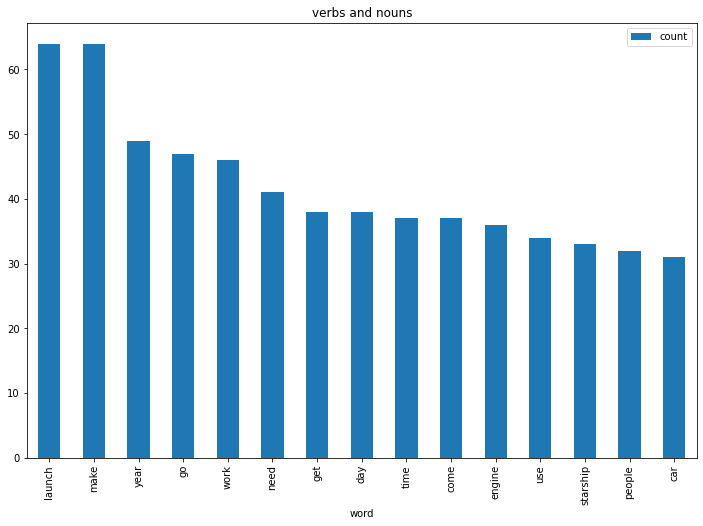

In [41]:
# Visualisation by Bar Chart
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='verbs and nouns')

In [42]:
# Emotion Minning - Sentiment Analysis
from nltk import tokenize
sent=tokenize.sent_tokenize(' '.join(mail))
sent

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [43]:
sent_df = pd.DataFrame(sent, columns=['sentences'])
sent_df

,sentences
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...
